In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import utils


features_1 = [
    'sx_x',
    'sx_y',
    'sx_z',
    'sx_roll',
    'sx_pitch',
    'sx_yaw',
    'sx_thumb',
    'sx_forefinger',
    'sx_middle_finger',
    'sx_ring_finger',
    'sx_little_finger',
    'dx_x',
    'dx_y',
    'dx_z',
    'dx_roll',
    'dx_pitch',
    'dx_yaw',
    'dx_thumb',
    'dx_forefinger',
    'dx_middle_finger',
    'dx_ring_finger',
    'dx_little_finger'
    ]


In [2]:
path = "./tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

In [3]:
df = pd.DataFrame(data, columns=['label', 'time_series'])

In [4]:
X = df['time_series']
y = df['label']
seed = 0

In [5]:
one = labels['hello'] # one-handed
two = labels['God'] #two-handed
spec_two = labels['where'] #specular two-handed

one_mask = df['label'] == one
two_mask = df['label'] == two
spec_two_mask = df['label'] == spec_two

one_data = df[one_mask].iloc[0]['time_series']
two_data = df[two_mask].iloc[0]['time_series']
spec_two_data = df[spec_two_mask].iloc[0]['time_series']

In [6]:
n_features_per_hand = 11
one_data[:,3+n_features_per_hand:6+n_features_per_hand].shape

(62, 3)

### Versor visualization
$$
\hat{i}, \hat{j}, \hat{k}
$$

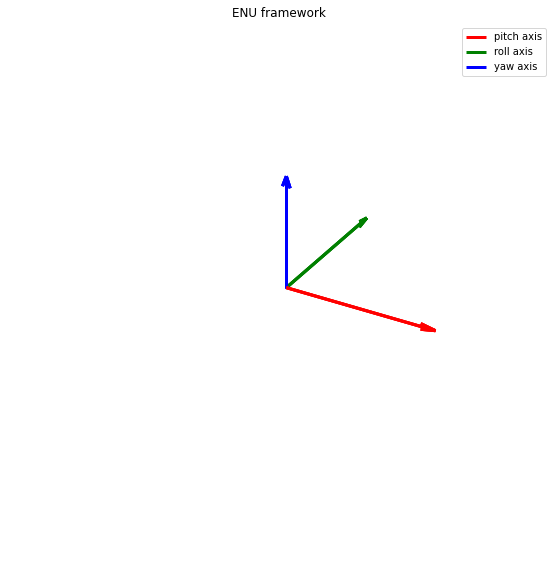

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from utils import rotation
    
soa = np.array([[1, 0, 0], [0, 1, 0],
                [0, 0, 1]])

origin = np.array([[0, 0, 0],[0, 0, 0],[0, 0, 0]]) # origin point


roll = 0
pitch = 0
yaw = 0

U, V, W = zip(*soa)
UVW = np.array([U, V, W])
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')

sx_R = rotation.rotation_matrix(roll, pitch, yaw)

UVW = sx_R.round()@np.array([U, V, W])

ax.quiver(*origin, *UVW[:,0], color=['r'], length=1, normalize=True, label='pitch axis', arrow_length_ratio=0.1, linewidths=3)
ax.quiver(*origin, *UVW[:,1], color=['g'], length=1, normalize=True, label='roll axis', arrow_length_ratio=0.1, linewidths=3)
ax.quiver(*origin, *UVW[:,2], color=['b'], length=1, normalize=True, label='yaw axis', arrow_length_ratio=0.1, linewidths=3)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.axis('off')
plt.title("ENU framework")
#plt.savefig("ENU_framework.png", format='png', dpi=500)
plt.show()

### If images are already written and you want to change the FPS rate in the video, use this cell

In [ ]:
import cv2
import numpy as np
import glob

folder_name = ''    # ex: god_gif
output_folder = ''  # ex: video
title = ''          # ex: rpy_god_mirror

fps_rate = 15

img_array = []
imgs = []
for filename in glob.glob(f'{folder_name}/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter(f'{output_folder}/{title}.mp4',cv2.VideoWriter_fourcc(*'mp4v'), fps_rate, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

# Hello sign (one-handed)

In [ ]:
from utils import visualization
sx_plot_dict = {'marker':'s', 'markersize':7, 'color':'tab:green', 'alpha':1, 'linestyle':'dotted', 'label':'sx'}
dx_plot_dict = {'marker':'s', 'markersize':7, 'color':'tab:red', 'alpha':1, 'linestyle':'dotted', 'label':'dx'}
visualization.plot_frames(one_data, lim=.3, sign='hello', folder='hello_gif', sx_plot_dict=sx_plot_dict, dx_plot_dict=dx_plot_dict, plot_axis=True)

import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('hello_gif/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('video/rpy_hello_mirror.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

# God sign (two-handed)

In [ ]:
from utils import visualization
sx_plot_dict = {'marker':'s', 'markersize':7, 'color':'tab:green', 'alpha':1, 'linestyle':'dotted', 'label':'sx'}
dx_plot_dict = {'marker':'s', 'markersize':7, 'color':'tab:red', 'alpha':1, 'linestyle':'dotted', 'label':'dx'}
visualization.plot_frames(two_data, lim=.3, sign='God', folder='god_gif', sx_plot_dict=sx_plot_dict, dx_plot_dict=dx_plot_dict, plot_axis=True)

import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('god_gif/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('video/rpy_god_mirror.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

# Where sign (specular two-handed)

In [ ]:
from utils import visualization
sx_plot_dict = {'marker':'s', 'markersize':7, 'color':'tab:green', 'alpha':1, 'linestyle':'dotted', 'label':'sx'}
dx_plot_dict = {'marker':'s', 'markersize':7, 'color':'tab:red', 'alpha':1, 'linestyle':'dotted', 'label':'dx'}
visualization.plot_frames(spec_two_data, lim=.3, sign='where', folder='where_gif', sx_plot_dict=sx_plot_dict, dx_plot_dict=dx_plot_dict, plot_axis=True)

import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('where_gif/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('video/rpy_where_mirror.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()